# IMDB Moview review

https://ai.stanford.edu/~amaas/data/sentiment/


## Download

In [ ]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2022-11-18 15:19:47--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  17.7MB/s    in 8.1s    

2022-11-18 15:19:55 (9.87 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [3]:
!rm -r aclImdb

In [4]:
!tar -xzf aclImdb_v1.tar.gz

## Installations

In [5]:
!pip install matplotlib==3.5.3 transformers==4.23.1 pytorch-lightning==1.8.0 bertviz==1.4.0

# Keep use of Torch CUDA

In [6]:
import torch

In [7]:
torch.__version__

'1.12.1'

In [8]:
torch.version.cuda

'11.3'

In [9]:
torch.rand((3,4)).to('cuda')

tensor([[0.8989, 0.6581, 0.4241, 0.9945],
        [0.1183, 0.5606, 0.0735, 0.3823],
        [0.6845, 0.9222, 0.3160, 0.1727]], device='cuda:0')

# Imports

In [10]:
import os
from pathlib import Path

import tqdm

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.3


In [11]:
DATA_ROOT = Path("aclImdb")

In [16]:
def read_dataset(dir_path):
    print("Processing:", dir_path)

    dir_names = [p.name for p in dir_path.glob("*") if not p.is_file()]
    print("Directory found:", dir_names)

    output_dict_ls = []

    for dir_name in dir_names:
        file_paths = (dir_path / dir_name).glob("*.txt")
        file_paths = list(file_paths)
        print("Dir:", dir_name, " - Files:", len(file_paths))
        print(file_paths[:5])


        for file_path in tqdm.tqdm(file_paths):
            
            with open(file_path, 'r', encoding='utf-8') as _f:
                data = _f.read()

            output_dict_ls.append({
                "name" : file_path.name,
                "text" : data,
                "target" : dir_name
            })

    return output_dict_ls

In [17]:
train_df = pd.DataFrame(read_dataset(DATA_ROOT / "train"))
test_df = pd.DataFrame(read_dataset(DATA_ROOT / "test"))

Processing: aclImdb/train
Directory found: ['unsup', 'neg', 'pos']
Dir: unsup  - Files: 50000
[PosixPath('aclImdb/train/unsup/49725_0.txt'), PosixPath('aclImdb/train/unsup/30762_0.txt'), PosixPath('aclImdb/train/unsup/9463_0.txt'), PosixPath('aclImdb/train/unsup/1105_0.txt'), PosixPath('aclImdb/train/unsup/13395_0.txt')]


100%|██████████| 50000/50000 [00:00<00:00, 50765.08it/s]


Dir: neg  - Files: 12500
[PosixPath('aclImdb/train/neg/9665_2.txt'), PosixPath('aclImdb/train/neg/6604_3.txt'), PosixPath('aclImdb/train/neg/7620_1.txt'), PosixPath('aclImdb/train/neg/2574_3.txt'), PosixPath('aclImdb/train/neg/7652_3.txt')]


100%|██████████| 12500/12500 [00:00<00:00, 46889.47it/s]


Dir: pos  - Files: 12500
[PosixPath('aclImdb/train/pos/2948_10.txt'), PosixPath('aclImdb/train/pos/6017_8.txt'), PosixPath('aclImdb/train/pos/1160_10.txt'), PosixPath('aclImdb/train/pos/94_10.txt'), PosixPath('aclImdb/train/pos/5585_7.txt')]


100%|██████████| 12500/12500 [00:00<00:00, 50537.83it/s]


Processing: aclImdb/test
Directory found: ['neg', 'pos']
Dir: neg  - Files: 12500
[PosixPath('aclImdb/test/neg/6266_4.txt'), PosixPath('aclImdb/test/neg/10055_1.txt'), PosixPath('aclImdb/test/neg/486_4.txt'), PosixPath('aclImdb/test/neg/7227_4.txt'), PosixPath('aclImdb/test/neg/7620_1.txt')]


100%|██████████| 12500/12500 [00:00<00:00, 45832.22it/s]


Dir: pos  - Files: 12500
[PosixPath('aclImdb/test/pos/1160_10.txt'), PosixPath('aclImdb/test/pos/11065_10.txt'), PosixPath('aclImdb/test/pos/5040_8.txt'), PosixPath('aclImdb/test/pos/12061_8.txt'), PosixPath('aclImdb/test/pos/94_10.txt')]


100%|██████████| 12500/12500 [00:00<00:00, 39344.39it/s]


In [18]:
train_df.head()

,name,text,target
0,49725_0.txt,Imagine hearing the major critics on the top o...,unsup
1,30762_0.txt,If you've seem either AIR BUD or AIR BUD 2: GO...,unsup
2,9463_0.txt,"Melodramatic, yes, but this movie has some mea...",unsup
3,1105_0.txt,"I participated in Vietnam Summer (1967), campa...",unsup
4,13395_0.txt,I watched this movie for a bit of a laugh plus...,unsup


In [19]:
def print_df(_df):

    print("Columns:", _df.columns)
    display(_df.head())
    print("Total NULL:", _df.isnull().sum().sum())
    print(_df.shape)
    print(_df.info())

In [20]:
print_df(train_df)

Columns: Index(['name', 'text', 'target'], dtype='object')


,name,text,target
0,49725_0.txt,Imagine hearing the major critics on the top o...,unsup
1,30762_0.txt,If you've seem either AIR BUD or AIR BUD 2: GO...,unsup
2,9463_0.txt,"Melodramatic, yes, but this movie has some mea...",unsup
3,1105_0.txt,"I participated in Vietnam Summer (1967), campa...",unsup
4,13395_0.txt,I watched this movie for a bit of a laugh plus...,unsup


Total NULL: 0
(75000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    75000 non-null  object
 1   text    75000 non-null  object
 2   target  75000 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [21]:
print_df(test_df)

Columns: Index(['name', 'text', 'target'], dtype='object')


,name,text,target
0,6266_4.txt,Mad scientist Professor Tabani drinks a potion...,neg
1,10055_1.txt,Veteran TV director Ted Post treats us to a pl...,neg
2,486_4.txt,"Okul""The School"" is a result of a new trend in...",neg
3,7227_4.txt,If Daphne Du Maurier had set REBECCA in 1950s ...,neg
4,7620_1.txt,Do you know what farmers spray on fields ? Tha...,neg


Total NULL: 0
(25000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    25000 non-null  object
 1   text    25000 non-null  object
 2   target  25000 non-null  object
dtypes: object(3)
memory usage: 586.1+ KB
None


In [22]:
palette ={"neg": "C0", "pos": "C1", "unsup": "C2"}

[Text(0, 0, '50000'), Text(0, 0, '12500'), Text(0, 0, '12500')]

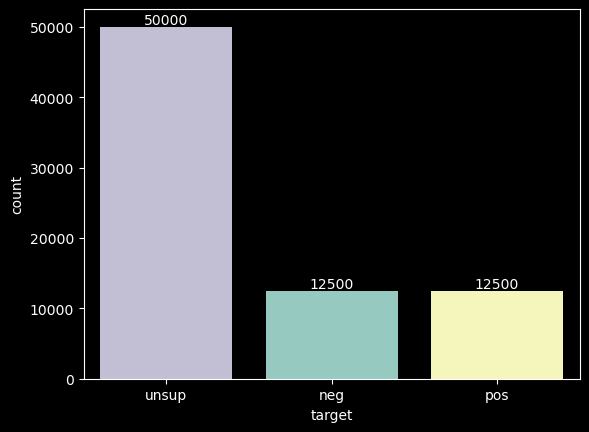

In [23]:
ax = sns.countplot(data=train_df, x='target', palette=palette)
ax.bar_label(ax.containers[0])

[Text(0, 0, '12500'), Text(0, 0, '12500')]

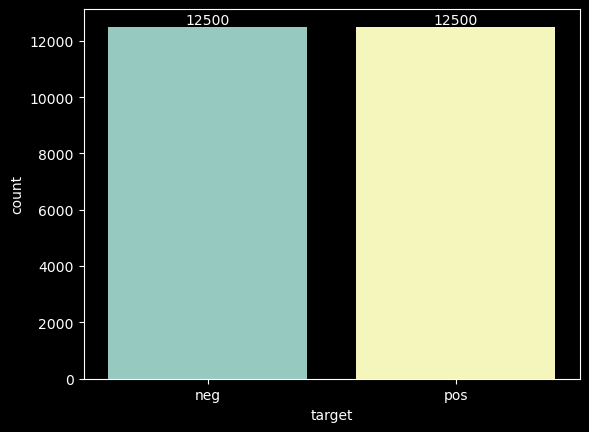

In [24]:
ax = sns.countplot(data=test_df, x='target', palette=palette)
ax.bar_label(ax.containers[0])

In [25]:
train_df = train_df[train_df.target != 'unsup']

In [26]:
train_df['total_tokens'] = train_df.text.apply(lambda x : len(x.split(" ")))

<AxesSubplot:xlabel='total_tokens', ylabel='Count'>

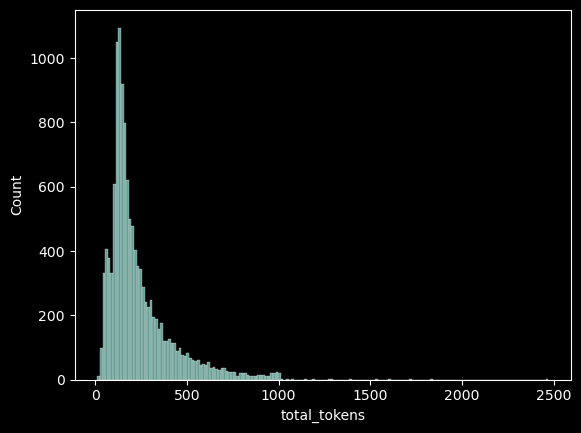

In [27]:
sns.histplot(data=train_df[train_df.target == 'pos'], x='total_tokens')

<AxesSubplot:xlabel='total_tokens', ylabel='Count'>

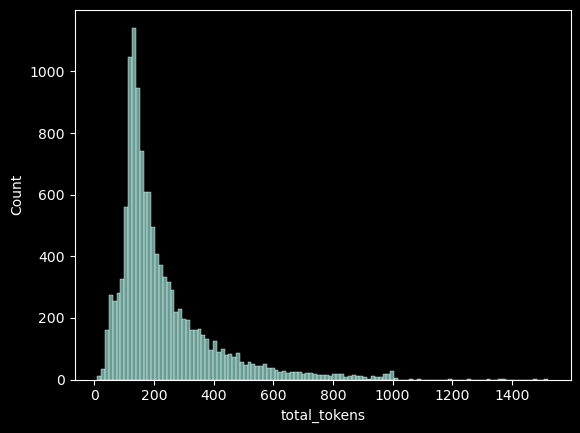

In [28]:
sns.histplot(data=train_df[train_df.target == 'neg'], x='total_tokens')

<AxesSubplot:xlabel='total_tokens', ylabel='Count'>

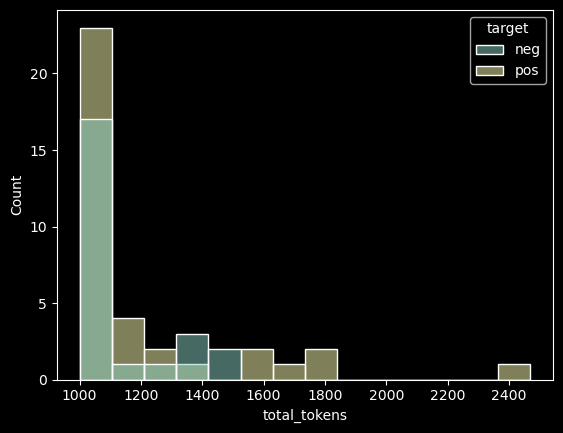

In [29]:
sns.histplot(data=train_df[(train_df.total_tokens >= 1000)], x='total_tokens', hue='target')

In [30]:
train_df.iloc[2].text

'I rented this movie because it sounded pretty interesting but to my Horror this movie was the worst movie I had ever seen! I read the comment from Gumby-8 and he has to be a part of the cast or the crew. Unless Gumby-8 is a 4 year old child or some demented cult member no one in their right mind would think that this movie had any potential at all.<br /><br />I couldn\'t believe Gumby-8\'s comments. <br /><br />Quoting: "From the "Dune" inspired opening animation to the quick pace...this film keeps the eye moving and works so well that repeat viewing is not unexpected."<br /><br />The Animation is the only aspect of the movie that was interesting and the fact of that the film keeps the eye moving, well that\'s because you keep looking for any type of suspense. I mean give me a break Halloween was shot with a budget of $100,000.00 and a painted mask and also by the way became a cult classic. As far as "repeat viewing is not unexpected" I think he made a typo.<br /><br />Another quote f

In [31]:
from sklearn.model_selection import StratifiedKFold

In [32]:
skf = StratifiedKFold(n_splits=5)

In [33]:
folds = [(train_idx, text_idx) for train_idx, text_idx in skf.split(train_df.text, train_df.target)]

In [34]:
for i, (train_idx, test_idx) in enumerate(folds):
    print("========= [FOLD]:", i)
    print(len(train_idx), len(test_idx))
    print(train_df.iloc[train_idx].target.value_counts())
    print(train_df.iloc[test_idx].target.value_counts())

========= [FOLD]: 0
20000 5000
neg    10000
pos    10000
Name: target, dtype: int64
neg    2500
pos    2500
Name: target, dtype: int64
========= [FOLD]: 1
20000 5000
neg    10000
pos    10000
Name: target, dtype: int64
neg    2500
pos    2500
Name: target, dtype: int64
========= [FOLD]: 2
20000 5000
neg    10000
pos    10000
Name: target, dtype: int64
neg    2500
pos    2500
Name: target, dtype: int64
========= [FOLD]: 3
20000 5000
neg    10000
pos    10000
Name: target, dtype: int64
neg    2500
pos    2500
Name: target, dtype: int64
========= [FOLD]: 4
20000 5000
neg    10000
pos    10000
Name: target, dtype: int64
neg    2500
pos    2500
Name: target, dtype: int64


In [35]:
train_fold, val_fold = train_df.iloc[folds[0][0]], train_df.iloc[folds[0][1]]

train_fold.shape, val_fold.shape

((20000, 4), (5000, 4))

In [36]:
import torch

from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AdamW

In [37]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
tokenizer

PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [38]:
def tokenization(text):

    tokens = tokenizer(text, padding='max_length', truncation=True, max_length=512)

    tokens = {k:torch.tensor(v) for k, v in tokens.items()}

    return tokens 

In [39]:
tokenization("this is sample text.")

{'input_ids': tensor([ 101, 2023, 2003, 7099, 3793, 1012,  102,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0, 

In [40]:
class IMDBDataset(Dataset):

    def __init__(self, df):
        self.df = df
        self.labels = ['neg', 'pos']

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):

        row = self.df.iloc[idx]
        text = row.text
        label = row.target

        tokens = tokenization(text)
        label = self.labels.index(label)
        label = torch.FloatTensor([label])

        return tokens, label

In [41]:
sample_ds = IMDBDataset(train_fold)

In [42]:
len(sample_ds)

20000

In [43]:
sample_ds[0]

({'input_ids': tensor([  101,  1008,  1008,  2089,  5383, 27594,  2545,  1008,  1008,  1026,
           7987,  1013,  1028,  1026,  7987,  1013,  1028,  1996, 12960,  2327,
           3238, 18869, 26001,  2178,  3376, 11561,  1998,  2014,  2269,  1006,
           2019, 18080,  2934,  3005,  4518,  6770,  2232, 10412,  2003,  3714,
           1999,  2028,  2915,  1998,  2878,  1999,  1996,  2279,  1007,  2013,
           1037,  5820,  1011,  8828,  1010, 27211,  1011,  3573, 22788,  1998,
          11808, 13157,  2041,  2000,  1011,  1011,  2054,  2842,  1029,  1011,
           1011,  3857,  1037,  2959, 14365,  1012, 15167,  1005,  1055,  9427,
           1010,  2066,  2216,  1997,  2070,  2060, 15536, 20058,  2078,  1010,
           4152,  8301,  8737,  3771,  2004,  1996,  3185,  9372,  2006,  1012,
           1996,  2197,  4664,  1997,  1996,  3185,  2003,  7422,  2000,  4013,
          24301, 11690,  2895,  1025,  2023,  8333,  2941,  4152,  2613, 11771,
           1010,  2613,  34

In [44]:
sample_dl = DataLoader(sample_ds, batch_size=2)

In [45]:
sample_x, sample_y = iter(sample_dl).next()
sample_x, sample_y

({'input_ids': tensor([[ 101, 1008, 1008,  ...,    0,    0,    0],
          [ 101, 2045, 2003,  ...,    0,    0,    0]]),
  'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
          [1, 1, 1,  ..., 0, 0, 0]])},
 tensor([[0.],
         [0.]]))

In [46]:
import torch.nn as nn

In [47]:
from transformers.configuration_utils import PretrainedConfig
from transformers.models.distilbert.modeling_distilbert import DistilBertPreTrainedModel, DistilBertModel

In [48]:
class IMBDModel(DistilBertPreTrainedModel):

    def __init__(self, config : PretrainedConfig):
        super(IMBDModel, self).__init__(config)

        self.distilbert = DistilBertModel(config)

        # # freeze whole model
        # for params in self.distilbert.parameters():
        #     params.requires_grad = False

        # layers = self.distilbert.transformer.layer
        # print("Total Layers:", len(layers))

        # # Enable trainable few layers.
        # for layer_num in [5]:
        #     for params in layers[layer_num].parameters():
        #         params.requires_grad = True

        self.fc = nn.Linear(config.dim, 1)

        self.post_init()

    def forward(self, x):

        x = self.distilbert(**x).last_hidden_state
        pooled_output = x[:, 0]

        x = self.fc(pooled_output)

        return x

In [49]:
sample_model = IMBDModel.from_pretrained("distilbert-base-uncased")
sample_model

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing IMBDModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing IMBDModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing IMBDModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of IMBDModel were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['fc.bias', 'fc.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


IMBDModel(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(in_fea

In [50]:
sample_model.config

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.23.1",
  "vocab_size": 30522
}

In [51]:
sample_model(sample_x)

tensor([[-0.3825],
        [-0.3247]], grad_fn=<AddmmBackward0>)

In [52]:
del sample_model

In [53]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint

import random
import numpy as np

from sklearn.metrics import roc_auc_score
import sklearn.metrics as sk_metrics
from sklearn.utils import shuffle

In [54]:
import seaborn as sns

In [55]:
loss_fn = nn.BCEWithLogitsLoss()

In [56]:
class IMBDModelLighting(pl.LightningModule):

    def __init__(self):
        super().__init__()
        self.model = IMBDModel.from_pretrained("distilbert-base-uncased")

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self.model(x)
        loss = loss_fn(y_pred, y)

        self.log("loss", loss, on_step=False, on_epoch=True)

        return loss

    def configure_optimizers(self):

        lr = 2e-5
        epsilon = 1e-6
        weight_decay = 0.01
        use_bertadam = False
        
        no_decay = ["bias", "LayerNorm.weight"]
        optimizer_grouped_parameters = [{
            "params": [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
            "weight_decay": weight_decay,
            "lr": lr,
        },
        {
            "params": [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
            "weight_decay": 0.0,
            "lr": lr,
        }]

        optimizer = AdamW(
            optimizer_grouped_parameters,
            lr=lr,
            eps=epsilon,
            correct_bias=not use_bertadam # bias correction step
        )

        return [optimizer]

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self.model(x)
        return y, y_pred

    def validation_epoch_end(self, validation_step_outputs):

        print("==================================")

        y_ls, y_pred_ls = [], []

        for y, y_pred in validation_step_outputs:
            y_ls.extend(y)
            y_pred_ls.extend(y_pred)

        y_ls = torch.stack(y_ls)

        y_pred_ls = torch.stack(y_pred_ls)
        y_pred_ls_act = torch.sigmoid(y_pred_ls)

        print("y_ls:", y_ls[:5])
        print("y_pred_ls:", y_pred_ls[:5])
        print("y_pred_ls_act:", y_pred_ls_act[:5])

        val_loss = loss_fn(y_pred_ls, y_ls)
        print("Val loss:", val_loss)

        self.log("val_loss", val_loss, on_epoch=True, on_step=False)

        # plot probability distribution
        y_np = y_ls.cpu().numpy().ravel()
        y_pred_ls_act = y_pred_ls_act.cpu().numpy().ravel()

        sns.histplot(x=y_pred_ls_act, hue=y_np)
        plt.show()

        # ROC AUC
        try:
            roc_auc = roc_auc_score(y_np, y_pred_ls_act)
            print("roc_auc:", roc_auc)

            self.log("roc_auc", roc_auc, on_epoch=True, on_step=False)

            fpr, tpr, thresholds = sk_metrics.roc_curve(y_np, y_pred_ls_act)

            plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
            plt.show()

        except Exception as e:
            print(e)

In [57]:
sample_pl = IMBDModelLighting()

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing IMBDModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing IMBDModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing IMBDModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of IMBDModel were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['fc.bias', 'fc.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [58]:
sample_pred_y = sample_pl.model(sample_x)
sample_pred_y

tensor([[-0.2097],
        [-0.1815]], grad_fn=<AddmmBackward0>)

In [59]:
sample_pl.training_step((sample_x, sample_y), None)

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/core/module.py:378: UserWarning: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`
  "You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet."


tensor(0.6002, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [60]:
del sample_pl

In [61]:
def set_seed():
    torch.manual_seed(0)
    random.seed(0)
    np.random.seed(0)

In [62]:
torch.cuda._is_in_bad_fork()

False

In [63]:
sanity_check = False 

In [64]:
fold = 0

set_seed()

train_fold_df = train_df.iloc[folds[fold][0]]
val_fold_df = train_df.iloc[folds[fold][1]]

if sanity_check:
    print("[sanity_check] Will use subset of data.")
    train_fold_df = shuffle(train_fold_df)[:500]
    val_fold_df = shuffle(val_fold_df)[:200]

train_loader = DataLoader(IMDBDataset(train_fold_df), batch_size=8, shuffle=True, drop_last=True)
val_loader = DataLoader(IMDBDataset(val_fold_df), batch_size=16)

print(len(train_loader), len(val_loader))

2500 313


In [65]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing IMBDModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing IMBDModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing IMBDModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of IMBDModel were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['fc.bias', 'fc.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using 16bit native Autom

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

y_ls: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')
y_pred_ls: tensor([[-2.8145],
        [-0.4844],
        [-1.9404],
        [-1.4463],
        [-1.9189]], device='cuda:0', dtype=torch.float16)
y_pred_ls_act: tensor([[0.0565],
        [0.3811],
        [0.1256],
        [0.1906],
        [0.1279]], device='cuda:0', dtype=torch.float16)
Val loss: tensor(0.3044, device='cuda:0')


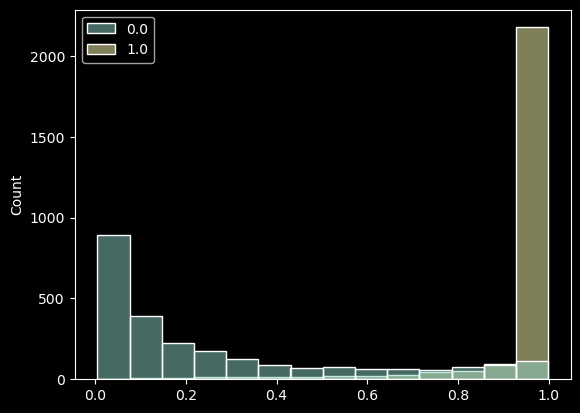

roc_auc: 0.97378784


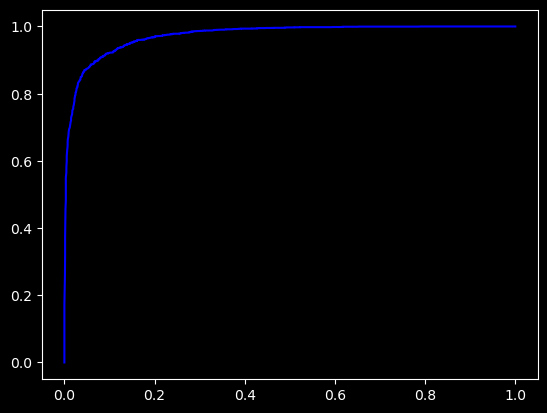

Validation: 0it [00:00, ?it/s]

y_ls: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')
y_pred_ls: tensor([[-4.4805],
        [-1.7871],
        [-5.4102],
        [-3.7852],
        [-5.7188]], device='cuda:0', dtype=torch.float16)
y_pred_ls_act: tensor([[0.0112],
        [0.1434],
        [0.0045],
        [0.0222],
        [0.0033]], device='cuda:0', dtype=torch.float16)
Val loss: tensor(0.1994, device='cuda:0')


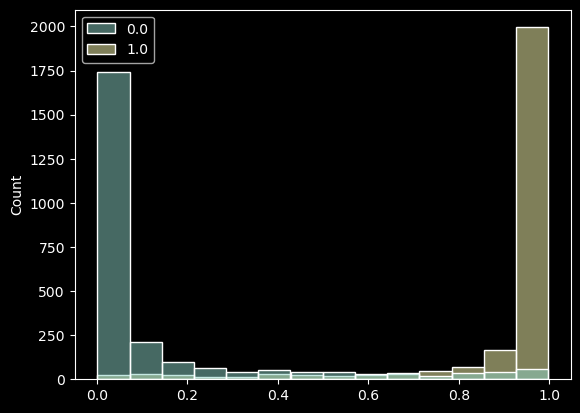

roc_auc: 0.9778816800000001


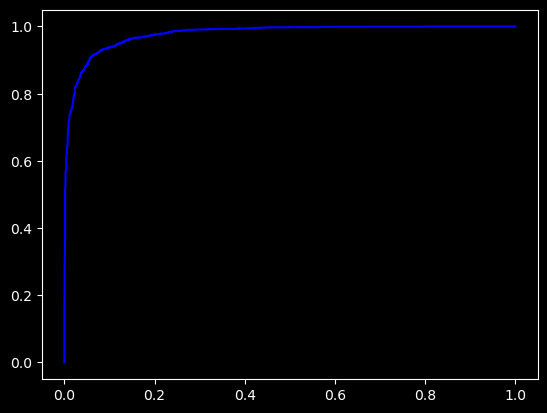

`Trainer.fit` stopped: `max_epochs=2` reached.


In [67]:
model = IMBDModelLighting()

checkpoint_callback = ModelCheckpoint(
    dirpath=f"model3/{fold}", 
    filename=f"fold{fold}_" + "epoch{epoch:02d}_loss{loss:.4f}_val_loss{val_loss:.4f}_roc_auc{roc_auc:.4f}", auto_insert_metric_name=False, 
    save_top_k=-1, monitor="val_loss"
)

trainer = pl.Trainer(num_sanity_val_steps=0, max_epochs=2, accelerator="gpu", precision=16, callbacks=[checkpoint_callback])
trainer.fit(model, train_loader, val_loader)

# clean memory
del model

In [68]:
loaded_pl_model = IMBDModelLighting.load_from_checkpoint("model3/0/fold0_epoch01_loss0.1403_val_loss0.1994_roc_auc0.9779.ckpt")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing IMBDModel: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing IMBDModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing IMBDModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of IMBDModel were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['fc.bias', 'fc.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [69]:
model_path_to_save = "model3/0/fold0_epoch01_loss0.1403_val_loss0.1994_roc_auc0.9779"
loaded_pl_model.model.save_pretrained(model_path_to_save)
tokenizer.save_pretrained(model_path_to_save)

('model3/0/fold0_epoch01_loss0.1403_val_loss0.1994_roc_auc0.9779/tokenizer_config.json',
 'model3/0/fold0_epoch01_loss0.1403_val_loss0.1994_roc_auc0.9779/special_tokens_map.json',
 'model3/0/fold0_epoch01_loss0.1403_val_loss0.1994_roc_auc0.9779/vocab.txt',
 'model3/0/fold0_epoch01_loss0.1403_val_loss0.1994_roc_auc0.9779/added_tokens.json',
 'model3/0/fold0_epoch01_loss0.1403_val_loss0.1994_roc_auc0.9779/tokenizer.json')

In [ ]:
!cp -r /content/model2 /content/drive/MyDrive/Kaggle/imdb_reviews

# Inference

In [70]:
infer_path = "model3/0/fold0_epoch01_loss0.1403_val_loss0.1994_roc_auc0.9779"

pretrained_model = IMBDModel.from_pretrained(infer_path, output_attentions=True)
pretrained_model.eval()
pretrained_model.to('cuda')

pretrained_tokenizer = AutoTokenizer.from_pretrained(infer_path)

In [71]:
import tqdm

In [72]:
score_ls = []

for text in tqdm.tqdm(test_df.text):

    tokens = pretrained_tokenizer(text, padding='max_length', truncation=True, max_length=512)
    tokens = {k:torch.tensor([v]).to('cuda') for k, v in tokens.items()}

    with torch.no_grad():
        scores = pretrained_model(tokens)

    scores = torch.sigmoid(scores).cpu().numpy()
    score_ls.append(scores)

100%|██████████| 25000/25000 [07:46<00:00, 53.63it/s]


In [73]:
score_ls = np.array(score_ls).ravel()

In [74]:
test_df['scores'] = score_ls

In [75]:
test_df.head()

,name,text,target,scores
0,6266_4.txt,Mad scientist Professor Tabani drinks a potion...,neg,0.032601
1,10055_1.txt,Veteran TV director Ted Post treats us to a pl...,neg,0.005993
2,486_4.txt,"Okul""The School"" is a result of a new trend in...",neg,0.024641
3,7227_4.txt,If Daphne Du Maurier had set REBECCA in 1950s ...,neg,0.976466
4,7620_1.txt,Do you know what farmers spray on fields ? Tha...,neg,0.050077


In [76]:
test_df['true'] = test_df.target.apply(lambda x : 0.0 if x == 'neg' else 1.0)

In [77]:
test_df.head()

,name,text,target,scores,true
0,6266_4.txt,Mad scientist Professor Tabani drinks a potion...,neg,0.032601,0.0
1,10055_1.txt,Veteran TV director Ted Post treats us to a pl...,neg,0.005993,0.0
2,486_4.txt,"Okul""The School"" is a result of a new trend in...",neg,0.024641,0.0
3,7227_4.txt,If Daphne Du Maurier had set REBECCA in 1950s ...,neg,0.976466,0.0
4,7620_1.txt,Do you know what farmers spray on fields ? Tha...,neg,0.050077,0.0


In [78]:
import torch.nn.functional as F

In [79]:
F.binary_cross_entropy(torch.FloatTensor(test_df.scores), torch.FloatTensor(test_df.true))

tensor(0.1946)

In [80]:
roc_auc = roc_auc_score(test_df.true, test_df.scores)
print("roc_auc:", roc_auc)

roc_auc: 0.9783720864000002


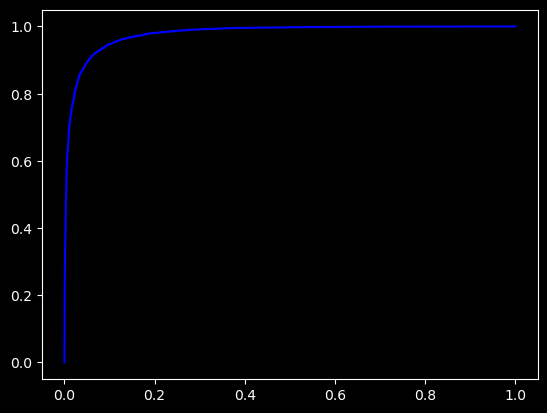

In [81]:
fpr, tpr, thresholds = sk_metrics.roc_curve(test_df.true, test_df.scores)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.show()

In [82]:
test_df['prediction'] = test_df.scores.apply(lambda x : 0.0 if x < 0.5 else 1.0)

In [83]:
test_df.head()

,name,text,target,scores,true,prediction
0,6266_4.txt,Mad scientist Professor Tabani drinks a potion...,neg,0.032601,0.0,0.0
1,10055_1.txt,Veteran TV director Ted Post treats us to a pl...,neg,0.005993,0.0,0.0
2,486_4.txt,"Okul""The School"" is a result of a new trend in...",neg,0.024641,0.0,0.0
3,7227_4.txt,If Daphne Du Maurier had set REBECCA in 1950s ...,neg,0.976466,0.0,1.0
4,7620_1.txt,Do you know what farmers spray on fields ? Tha...,neg,0.050077,0.0,0.0


In [84]:
from sklearn.metrics import confusion_matrix, classification_report

In [85]:
confusion_matrix(test_df.true, test_df.prediction)

array([[11250,  1250],
       [  660, 11840]])

In [86]:
print(classification_report(test_df.true, test_df.prediction))

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     12500
         1.0       0.90      0.95      0.93     12500

    accuracy                           0.92     25000
   macro avg       0.92      0.92      0.92     25000
weighted avg       0.92      0.92      0.92     25000



# Visualization

In [ ]:
# class IMBDModelInfer(IMBDModel):

#     def __init__(self, config : PretrainedConfig):
#         super(IMBDModelInfer, self).__init__(config)

#         self.distilbert = DistilBertModel(config)

#         # freeze whole model
#         for params in self.distilbert.parameters():
#             params.requires_grad = False

#         layers = self.distilbert.transformer.layer
#         print("Total Layers:", len(layers))

#         # Enable trainable few layers.
#         for layer_num in [5]:
#             for params in layers[layer_num].parameters():
#                 params.requires_grad = True

#         self.fc = nn.Linear(config.dim, 1)

#         self.post_init()

#     def forward(self, x):

#         x_out = self.distilbert(**x)
#         pooled_output = x_out.last_hidden_state[:, 0]

#         x = self.fc(pooled_output)

#         return x

# row = test_df.iloc[100]
# text = row.text
# row, text


# tokens = pretrained_tokenizer(text, return_tensors='pt', padding='max_length', truncation=True, max_length=512).to('cuda')
# tokens

# word_tokens= pretrained_tokenizer.convert_ids_to_tokens(tokens['input_ids'][0])
# len(word_tokens), print(word_tokens)

# score, attentions = pretrained_model(tokens)
# score.shape, len(attentions), attentions[-1].shape

# last_layer_head = attentions[-1][:,:,0,:].detach().cpu().numpy()[0]
# last_layer_head.shape

# import IPython

# def wrap_text(word, score):
#     return f"<span style='background-color:rgba(255, 255, 0, {score:.2f});padding:2px;'>{word}</span>"

# for i in range(12):
# print("======================")
# html = "".join([wrap_text(w,s) for w,s in zip(word_tokens, last_layer_head[i])])
# display(IPython.display.HTML(html))

# Experimentations:

<pre>
1) distilbert-base-uncased


(1.1)
fold = 0
lr = 1e-4
freeze all layer + fc (learnable)
epoch at (2) = roc_auc: 0.9051, val loss = 0.4609

1.2
fold = 0
lr = 1e-4
freeze 5 layer + 6th layer learnable + fc (learnable)
epoch at (2) = roc_auc: 0.9685, val loss = 0.2297

1.3
fold = 0
lr = 2e-5
epsilon = 1e-6
weight_decay = 0.01
use_bertadam = False
full model learnable 
epoch at (2) = roc_auc: 0.9725, val loss = 0.2260




</pre>

